# Report for project 1 
### Statistical Data Analysis 2

#### Task 1 - data exploration

a) 
Train set has 72208 observations and 5000 variables.

Test set has 18052 observations and 5000 variables.

b) 
###### Raw data
Firstly, let's look at the train raw data spanned by all possible values. We can see that there is a one huge bar close to zero and it doesn't allow to see anything else. So, let's look at the same data, but in the gene expression range from 0 to 10. Now we can see that there are may observations corresponding to other values than zero. All values are integers. For closer look we can skip the zero value.


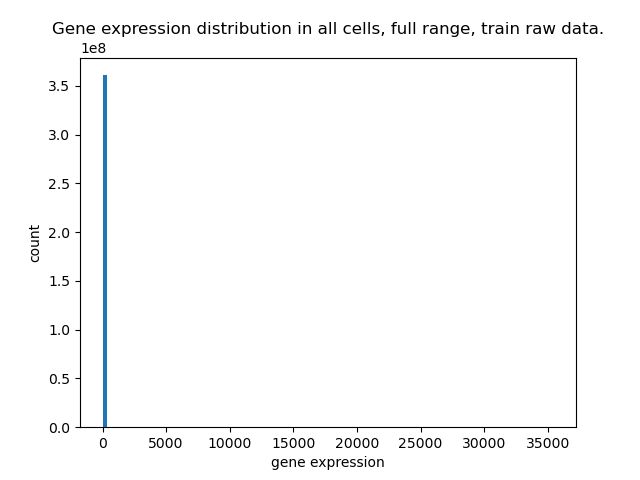

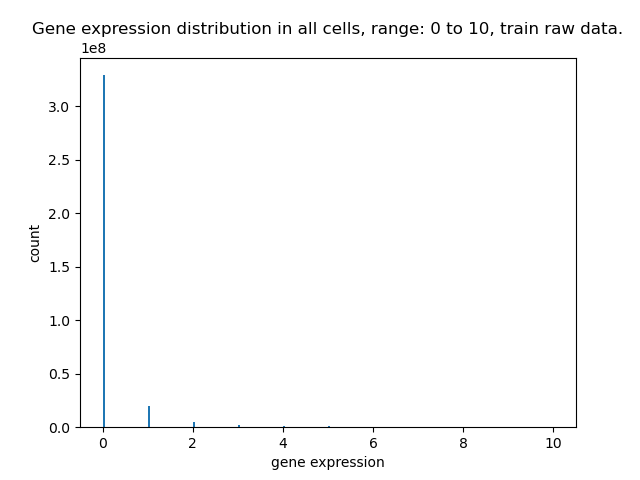

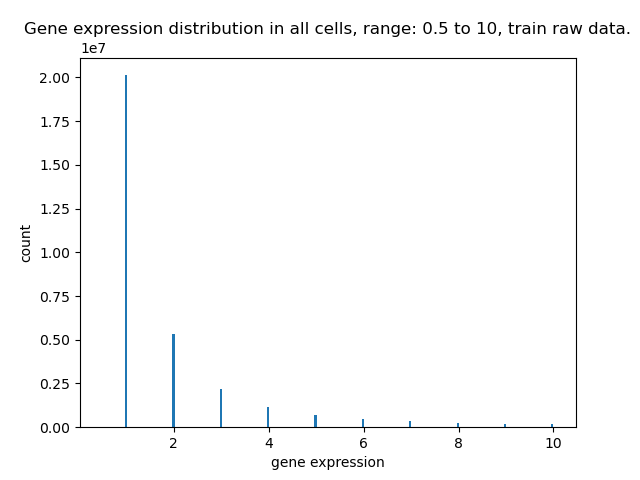

In [24]:
from IPython.display import Image, display, HTML
display(Image(filename='plots/train_raw_full.png', width = 400))
display(Image(filename='plots/train_raw_0_10.png', width = 400))
display(Image(filename="plots/train_raw_05_10.png", width = 400))

Now, the same thing for the test raw data. 


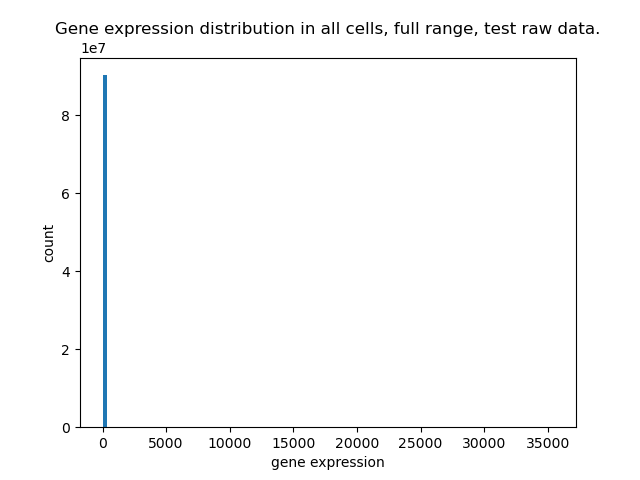

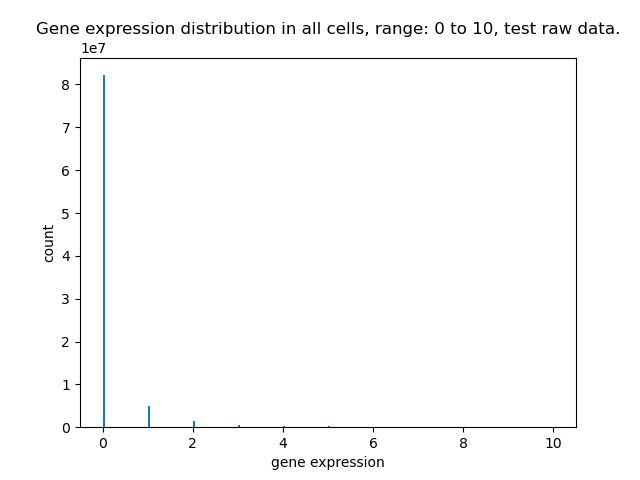

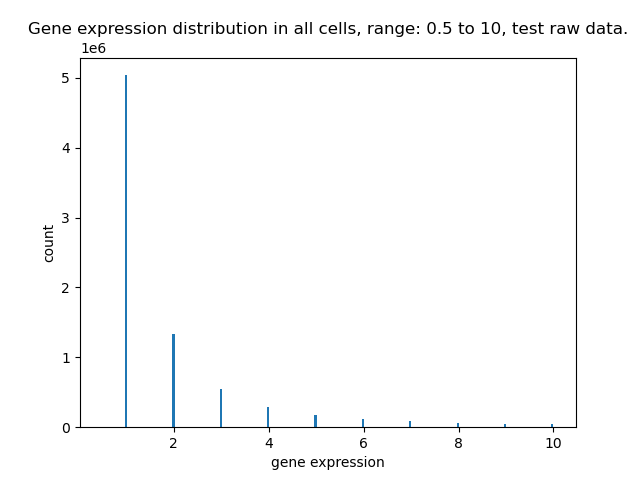

In [25]:
display(Image(filename='plots/test_raw_full.png', width = 400))
display(Image(filename='plots/test_raw_0_10.png', width = 400))
display(Image(filename="plots/test_raw_05_10.png", width = 400))

###### Preprocessed data
As we've seen, raw data contains only gene expression values as integers. Here are the same plots, but for preprocessed data. First the training preprocessed data:


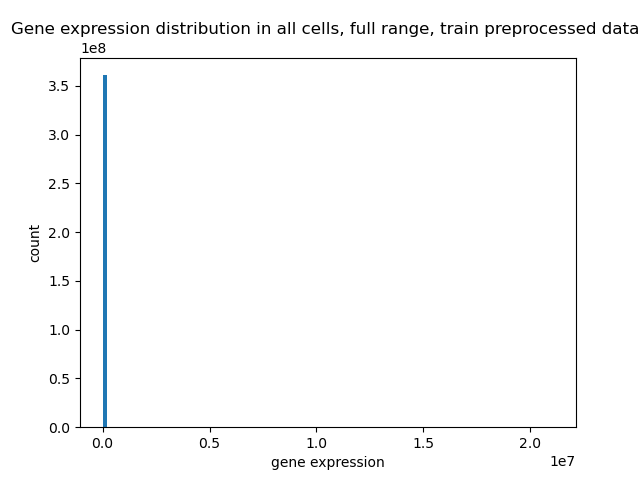

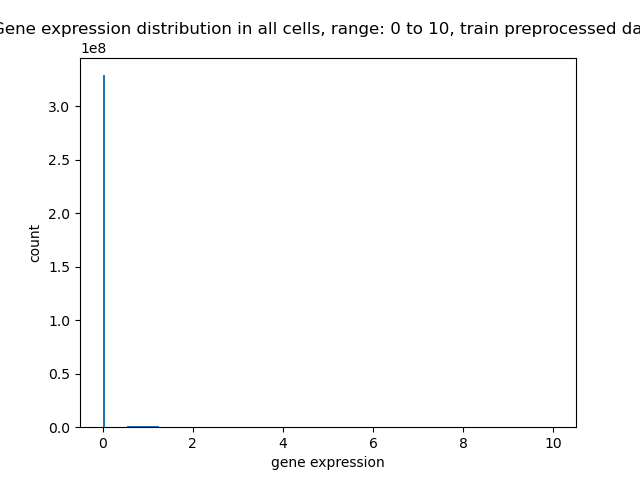

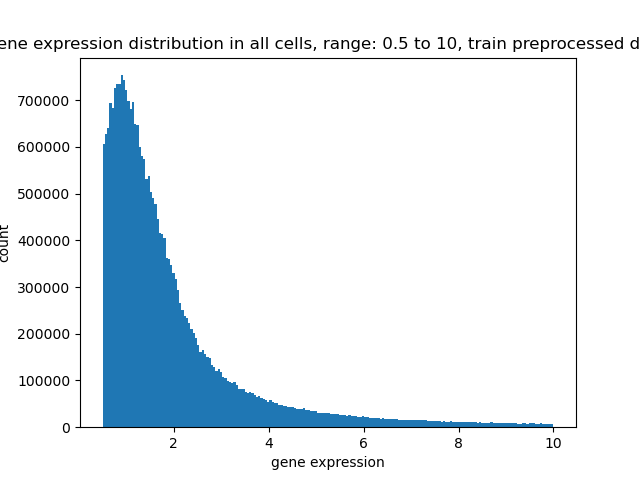

In [26]:
display(Image(filename='plots/train_pp_full.png', width = 400))
display(Image(filename='plots/train_pp_0_10.png', width = 400))
display(Image(filename="plots/train_pp_05_10.png", width = 400))

Now, test preprocessed data:

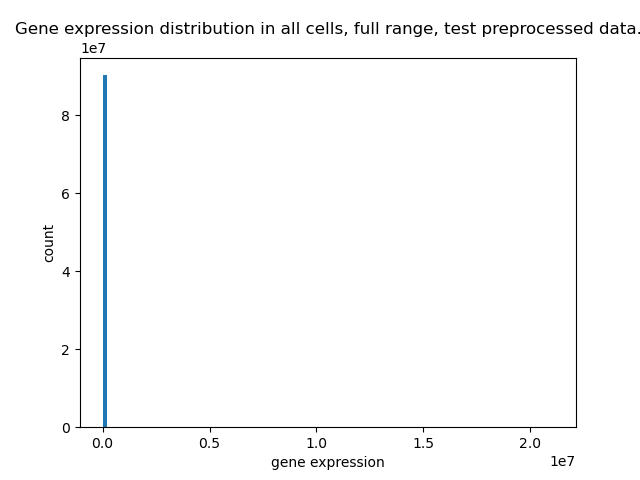

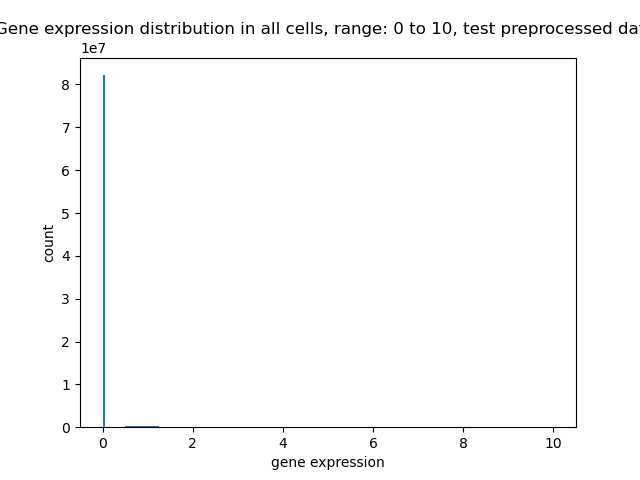

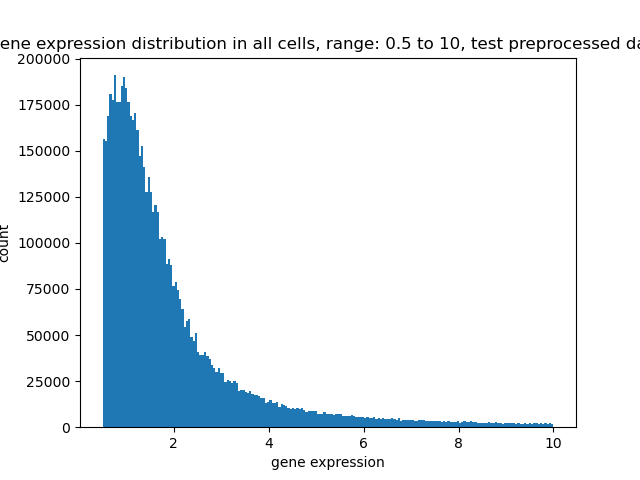

In [28]:
display(Image(filename='plots/test_pp_full.png', width = 400))
display(Image(filename='plots/test_pp_0_10.png', width = 400))
display(Image(filename="plots/test_pp_05_10.png", width = 400))

c) Let's sum up information about raw and preprocessed data by using some basic statistics.
###### Summary of training raw data:
Minimal value: 0 \
Maximal value: 35 451 \
Mean: 0.4421075 \
Median: 0.0 \
There are 328 811 428 zeros. \
There are 20 125 032 ones. \
There are 1 301 756 values greater than 10.  

###### Summary of training preprocessed data:
Minimal value: 0\
Maximal value: 21 078 940 \
Mean: 3.42741\
Median: 0.0\
There are 328 811 428 zeros\
There are 0 ones.\
There are 1 831 190 values greater than 10. \

###### Summary of test raw data:
Minimal value: 0\
Maximal value: 35 451\
Mean: 0.44727832\
Median: 0.0\
There are 82 169 425 zeros.\
There are 5 039 252 ones.\
There are 330 617 values greater than 10.

###### Summary of test preprocessed data:
Minimal value: 0.0\
Maximal value: 21 078 940.0\
Mean: 3.657701\
Median: 0.0\
There are 82 169 425 zeros.\
There are 0 ones.\
There are 456 032 values greater than 10.



While searching for common techiques that are applied on raw gene expression data I found out about normalization factor aka size factor. Dividing read counts from each sample by sample's size factor normalizes data throughout all samples by taking into account factors as sequencing depth and RNA composition.

I checked if maybe out data was preprocessed in such manner, as we have a column with size factors in adata.obs and turns out it was!

```python
train_data = load_data("SAD2022Z_Project1_GEX_train.h5ad")
train_gex_size_factor = train_data.obs["GEX_size_factors"].array
train_raw_d = train_data.layers["counts"].toarray()
train_pp_guess = train_raw_d/train_gex_size_factor[:, None]
train_pp_guess = train_pp_guess.reshape(train_pp_guess.shape[0]*train_pp_guess.shape[1],1)
stats(train_pp_guess)
```

Basic statistics as above are the same for adata.X and for "guessed" normalization.

[source](https://hbctraining.github.io/DGE_workshop/lessons/02_DGE_count_normalization.html)

d) 
###### Preprocessed
Training preprocessed data without zeros in full range of values, in range from 0 to 20.


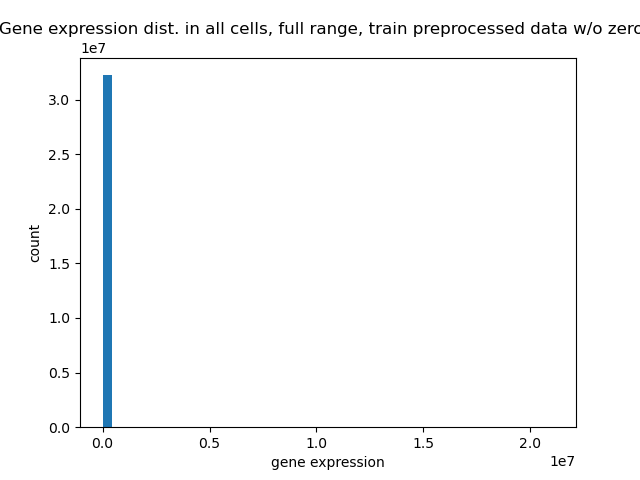

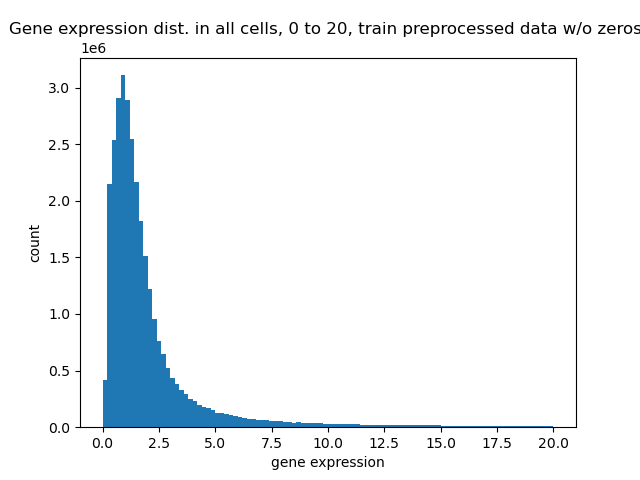

In [29]:
display(Image(filename='plots/train_pp_full_nozeros.png', width = 400))
display(Image(filename='plots/train_pp_nozeros_0_20.png', width = 400))


Test preprocessed data without zeros in full range of values and in a range from 0 to 20:

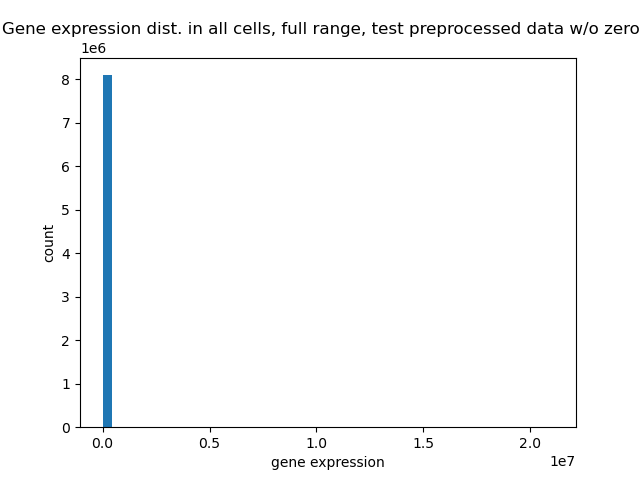

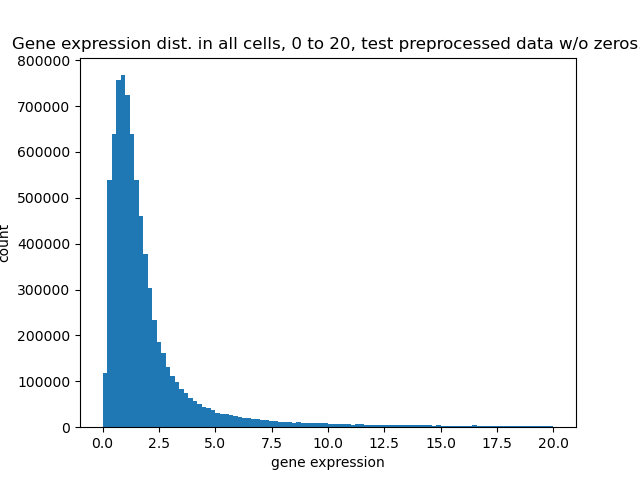

In [30]:
display(Image(filename='plots/test_pp_full_nozeros.png', width = 400))
display(Image(filename='plots/test_pp_nozeros_0_20.png', width = 400))


###### Raw
Train raw data without zeros in full range of values and in a range from 0 to 20:


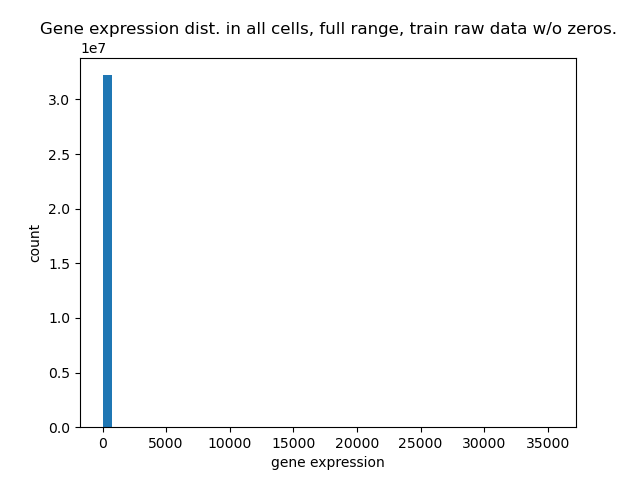

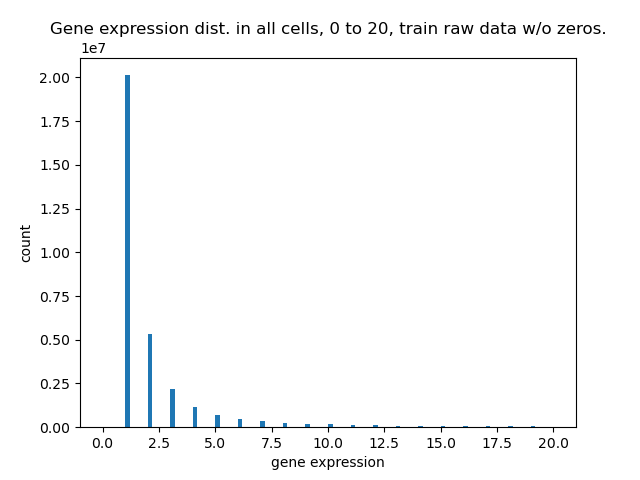

In [31]:
display(Image(filename='plots/train_raw_full_nozeros.png', width = 400))
display(Image(filename='plots/train_raw_nozeros_0_20.png', width = 400))

Test raw data without zeros in full range of values and in range from 0 to 20:

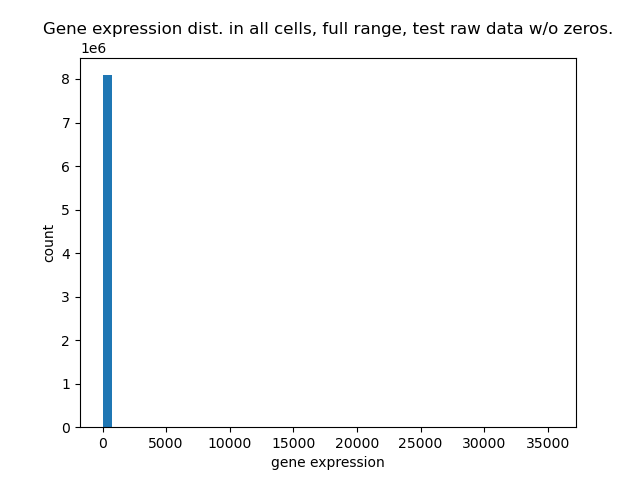

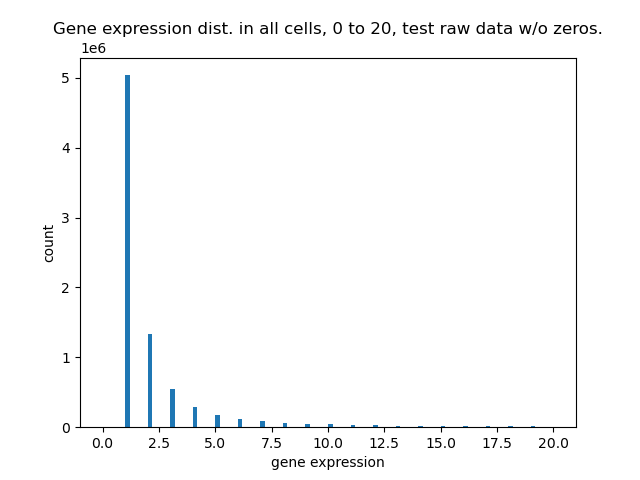

In [32]:
display(Image(filename='plots/test_raw_full_nozeros.png', width = 400))
display(Image(filename='plots/test_raw_nozeros_0_20.png', width = 400))

e) The distribution in both raw and preprocessed cases shows that there are plenty of zero values and values from zero to two. The higher the value gets, the less observations are supporting it. Biological explanation for it is that in our data we have many observations where gene expression is zero, which means there is no expression of such gene. Also, there are many observations where specific genes reach very low expression - values 0 to 5 (very low values considering the highest in raw data is 35 451 and in preprocessed data 21 078 940).

f) In adata.obs dataframe we can find columns: 'GEX_n_genes_by_counts', GEX_pct_counts_mt', 'GEX_size_factors','GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'.

This is additional data about samples and patients that they came from.

There are 45 types of cells from 9 different patients. There are 4 labs that samples came from.

### Vanilla VAE training

###### Processing
There was log1p applied on data due to problems with gradient computing.

Histograms for preprocessed training data with applied log1p:



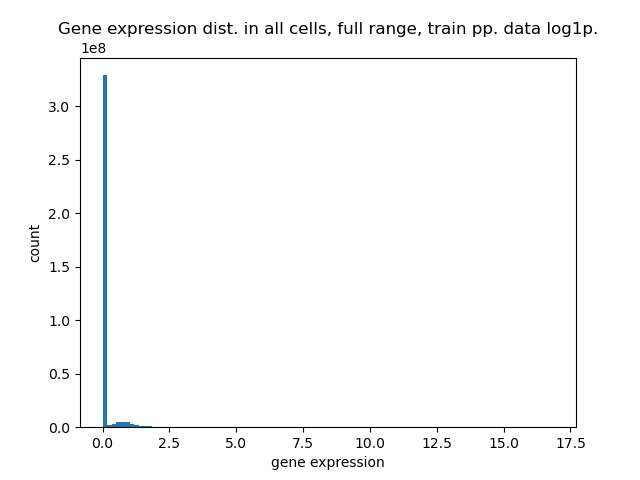

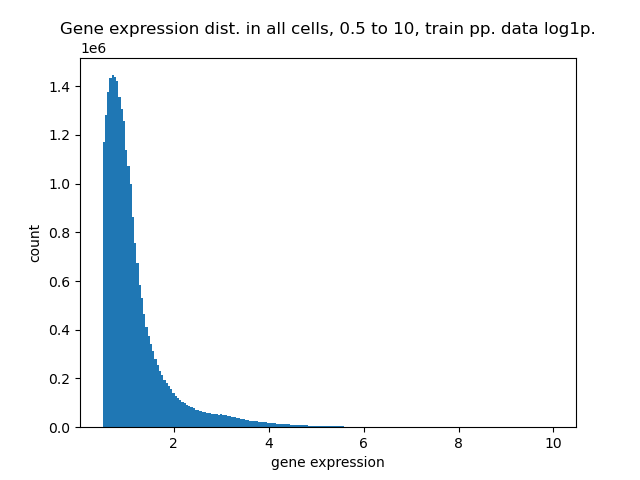

In [33]:
display(Image(filename='plots/train_pp_full_log.png', width = 400))
display(Image(filename='plots/train_pp_05_10_log.png', width = 400))

#### Vanilla VAE

```python
class Network(torch.nn.Module):
  def __init__(self, input_dim, h_dim = 200, z_dim=20, o_dim=20):
    super(Network, self).__init__()
    self.img2hid = nn.Linear(input_dim, h_dim)
    self.hid2mu_e = nn.Linear(h_dim, z_dim)
    self.hid2sigma_e = nn.Linear(h_dim, z_dim)

    self.z2hid = nn.Linear(z_dim, h_dim)
    self.hid2mu_d = nn.Linear(h_dim, input_dim)
    self.hid2sigma_d = nn.Linear(h_dim, input_dim)

    self.relu = nn.ReLU()

  def encode(self, x):
    h = self.relu(self.img2hid(x))
    mu, sigma = self.hid2mu_e(h), self.hid2sigma_e(h)
    return mu, sigma

  def decode(self, z):
    h = self.relu(self.z2hid(z))
    mu, sigma = self.hid2mu_d(h), self.hid2sigma_d(h)
    return mu, sigma

class EncoderGaussian(torch.nn.Module):
  def __init__(self, network):
    super(EncoderGaussian, self).__init__()
    self.network = network
    self.dist = None
    self.mu = None
    self.var = None
    self.log_var = None

  def log_prob(self,x):
    return self.dist.log_prob(x).sum(-1)

  def _sample(self):
    return self.dist.rsample()
  
  def forward(self,x):
    mu, log_var = self.network.encode(x)
    var = torch.exp(log_var)
    cov = torch.diag_embed(var)
    self.dist = torch.distributions.MultivariateNormal(mu, cov)
    self.mu = mu
    self.log_var = log_var
    self.var = var
    return mu, var

class DecoderGaussian(torch.nn.Module):
  def __init__(self, network):
    super(DecoderGaussian, self).__init__()
    self.network = network
    self.mu = None
    self.var = None
    self.dist = None

  def _sample(self):
    return torch.sigmoid(self.dist.sample()) #??sigmoud??

  def log_prob(self,x):
    return self.dist.log_prob(x).sum(-1)

  def forward(self,x):
    mu, log_var = self.network.decode(x)
    var = torch.exp(log_var)
    cov = torch.diag_embed(var)
    self.dist = torch.distributions.MultivariateNormal(mu, cov)
    self.mu = mu
    self.var = var
    return mu, var


class VAE(nn.Module):
  def __init__(self, encoder, decoder):
    super().__init__()
    self.encoder = encoder
    self.decoder = decoder
    self.prior_dist = torch.distributions.MultivariateNormal(torch.zeros([Z_DIM]).to(DEVICE), torch.eye(Z_DIM).to(DEVICE))

  def loss_fn(self, x):
    reconstruction_loss = self.decoder.log_prob(x)
    regularization_loss = BETA*torch.sum(torch.distributions.kl.kl_divergence(self.prior_dist, self.encoder.dist))
    elbo = reconstruction_loss - regularization_loss
    return -elbo, reconstruction_loss, regularization_loss

  def encode(self, x):
    self.encoder.forward(x)
    z = self.encoder._sample()
    return z

  def decode(self, z):
    self.decoder.forward(z)
    x_hat = self.decoder._sample()
    return x_hat
    
  def forward(self,x):
    z = self.encode(x)
    x_hat = self.decode(z)
    return z, x_hat

class RNAseq_Dataset(Dataset):
  def __init__(self, matrix, cell_types):
    self.rows = [matrix[i, :] for i in range(matrix.shape[0])]
    self.targets = list(zip(self.rows, cell_types))

  def __getitem__(self, index):
    sc, ct = self.targets[index]
    return sc, ct
```

Due to limited time and long calculations I trained VAE only on 0.5% of the data - one epoch, batch size 10. Therefore, following plots are based on iterations, not epochs.

a) Learning curves for training set and test set while training:


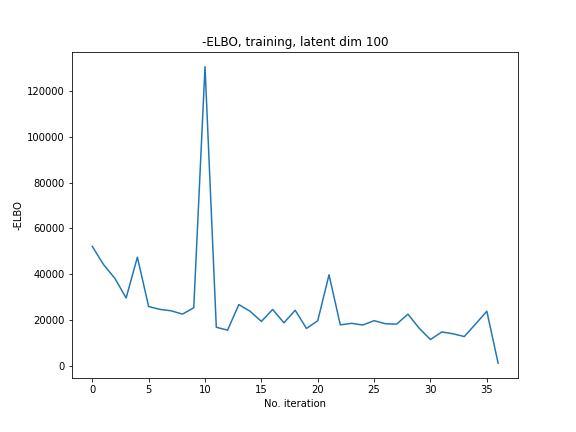

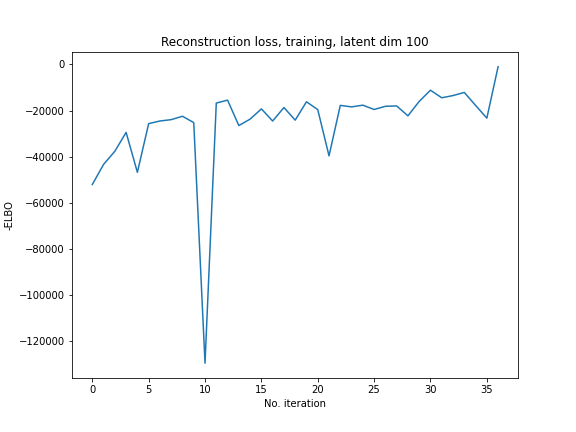

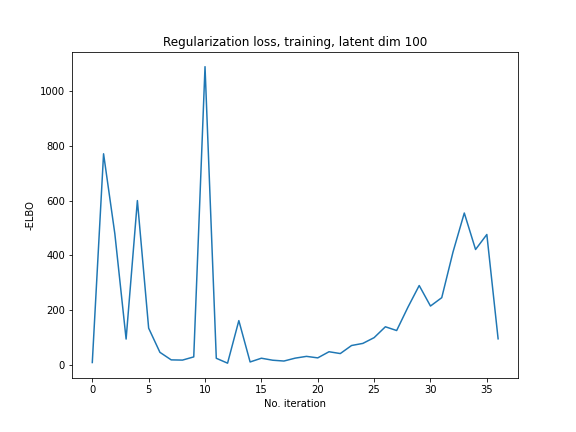

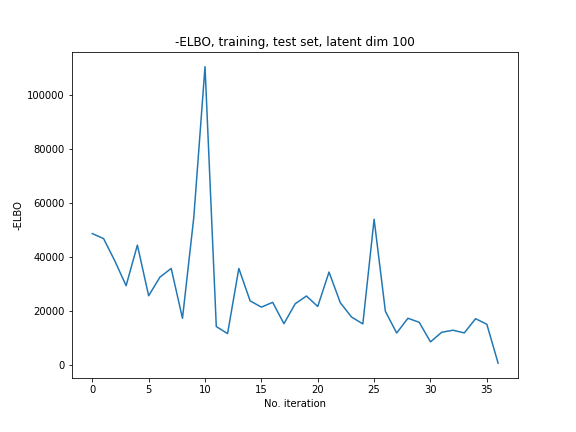

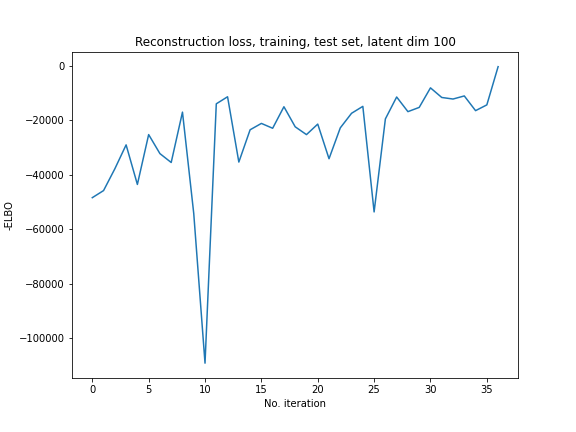

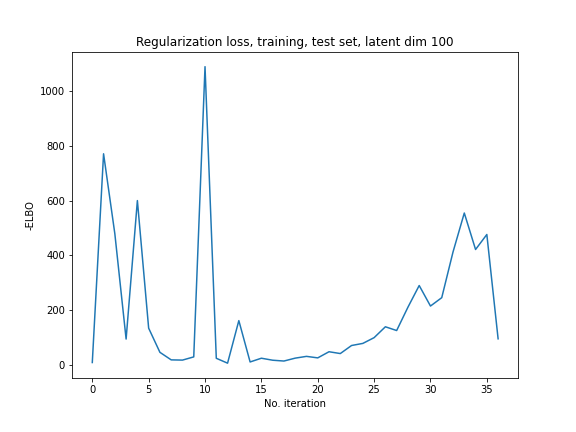

In [35]:
display(Image(filename='plots/TRAIN_ELBO_b1_epochs1_hdim300_zdim100_lr0.005_batch10.png', width = 400))
display(Image(filename='plots/TRAIN_REC_LOSS_b1_epochs1_hdim300_zdim100_lr0.005_batch10.png', width = 400))
display(Image(filename='plots/TRAIN_REG_LOSS_b1_epochs1_hdim300_zdim100_lr0.005_batch10.png', width = 400))
display(Image(filename='plots/TEST_ELBO_b1_epochs1_hdim300_zdim100_lr0.005_batch10.png', width = 400))
display(Image(filename='plots/TEST_REC_LOSS_b1_epochs1_hdim300_zdim100_lr0.005_batch10.png', width = 400))
display(Image(filename='plots/TEST_REG_LOSS_b1_epochs1_hdim300_zdim100_lr0.005_batch10.png', width = 400))

b) Number of principal components that explain more than 95% of the variance of latent space.

Model with latent space size = 50: 44 principal components

Model with latent space size = 100: 85 principal components

Model with latent space size = 150: 120 principal components

##### ELBO for testing on models with different latent space sizes:

-ELBO after last iteration of testing on model with latent space size torch.Size([1, 50]) tensor(5083.1313)

-ELBO after last iteration of testing on model with latent space size torch.Size([1, 100]) tensor(4949.6885)

-ELBO after last iteration of testing on model with latent space size torch.Size([1, 150]) tensor(6479.8071)

Plots for PCA

#### Latent space size = 50


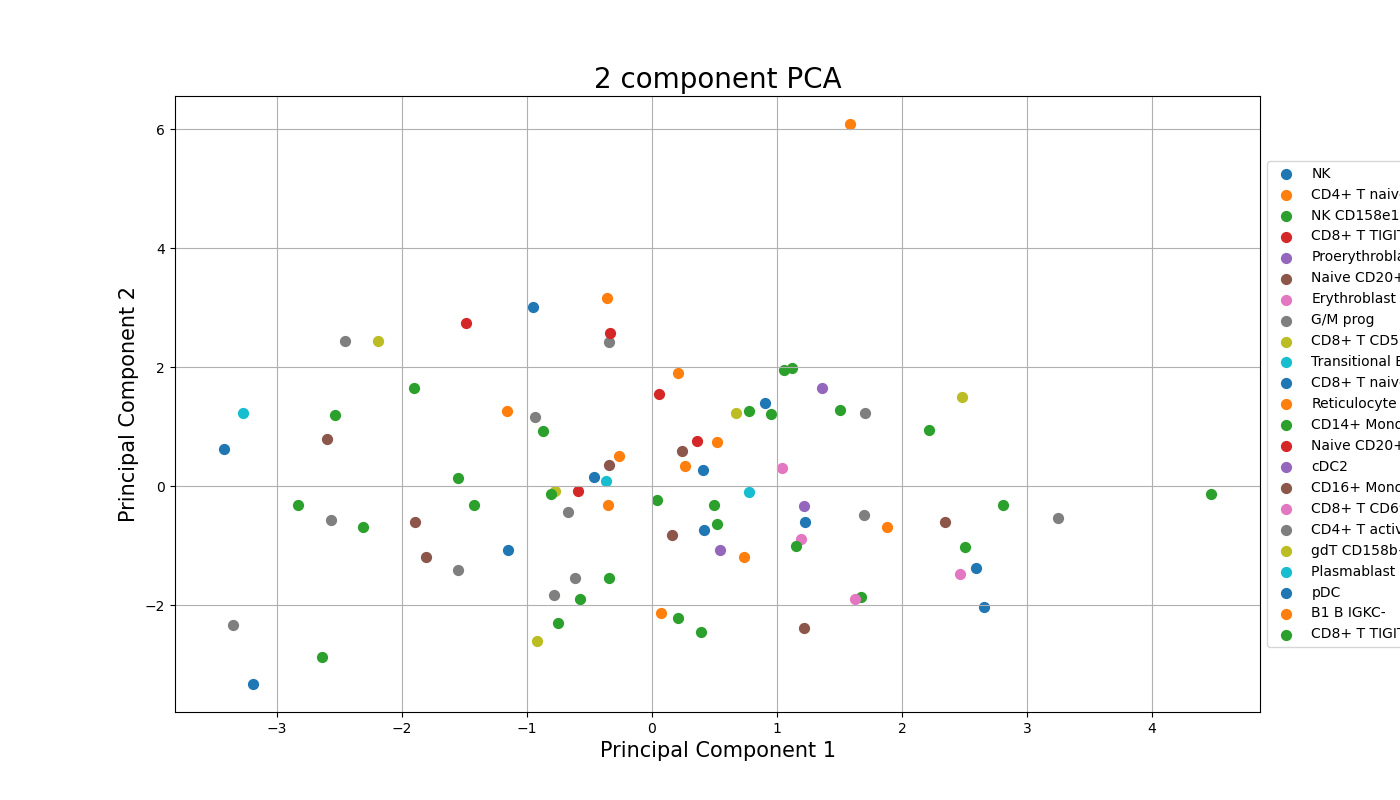

In [38]:
display(Image(filename='plots/PCA_test_zdim50.png', width = 600))

#### Latent space size = 100

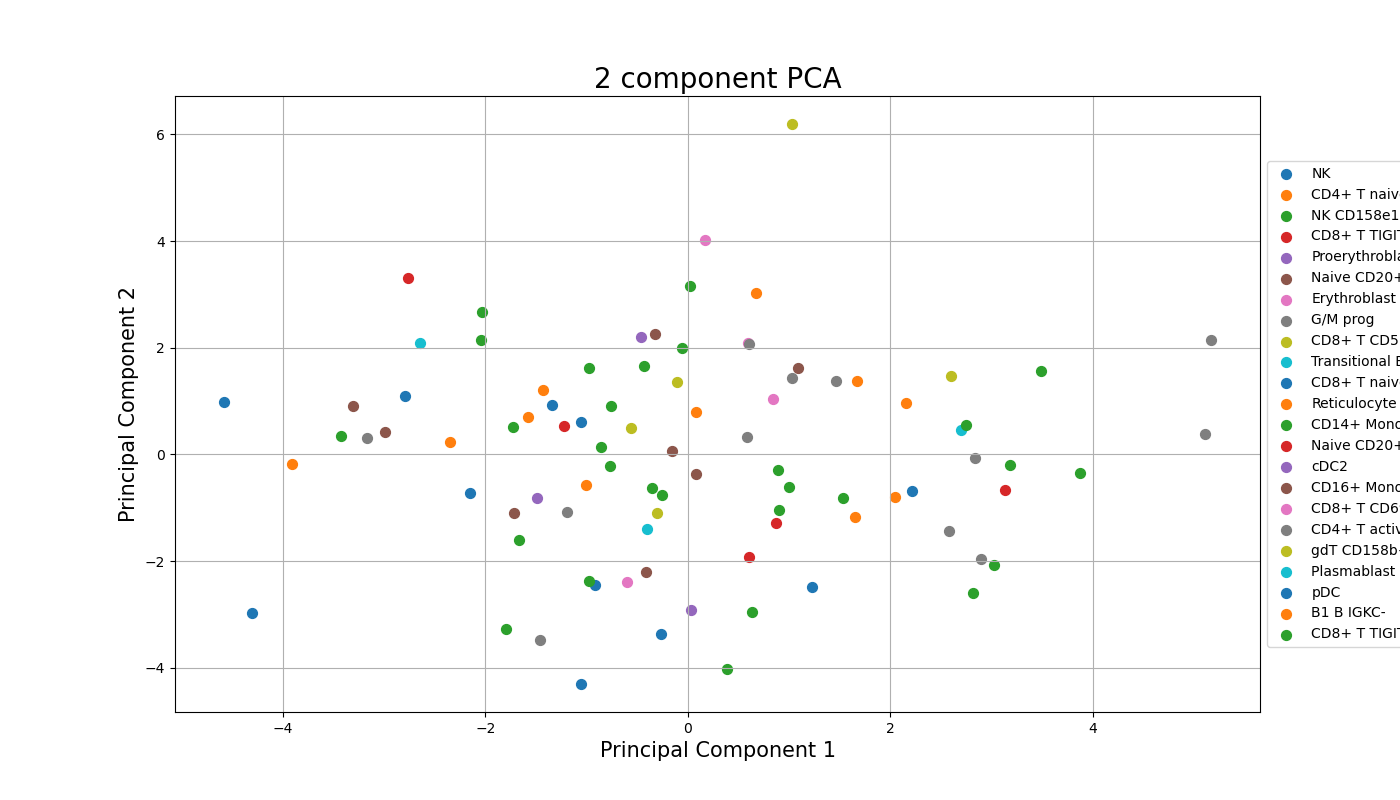

In [39]:
display(Image(filename='plots/PCA_test_zdim100.png', width = 600))

#### Latent space size = 150


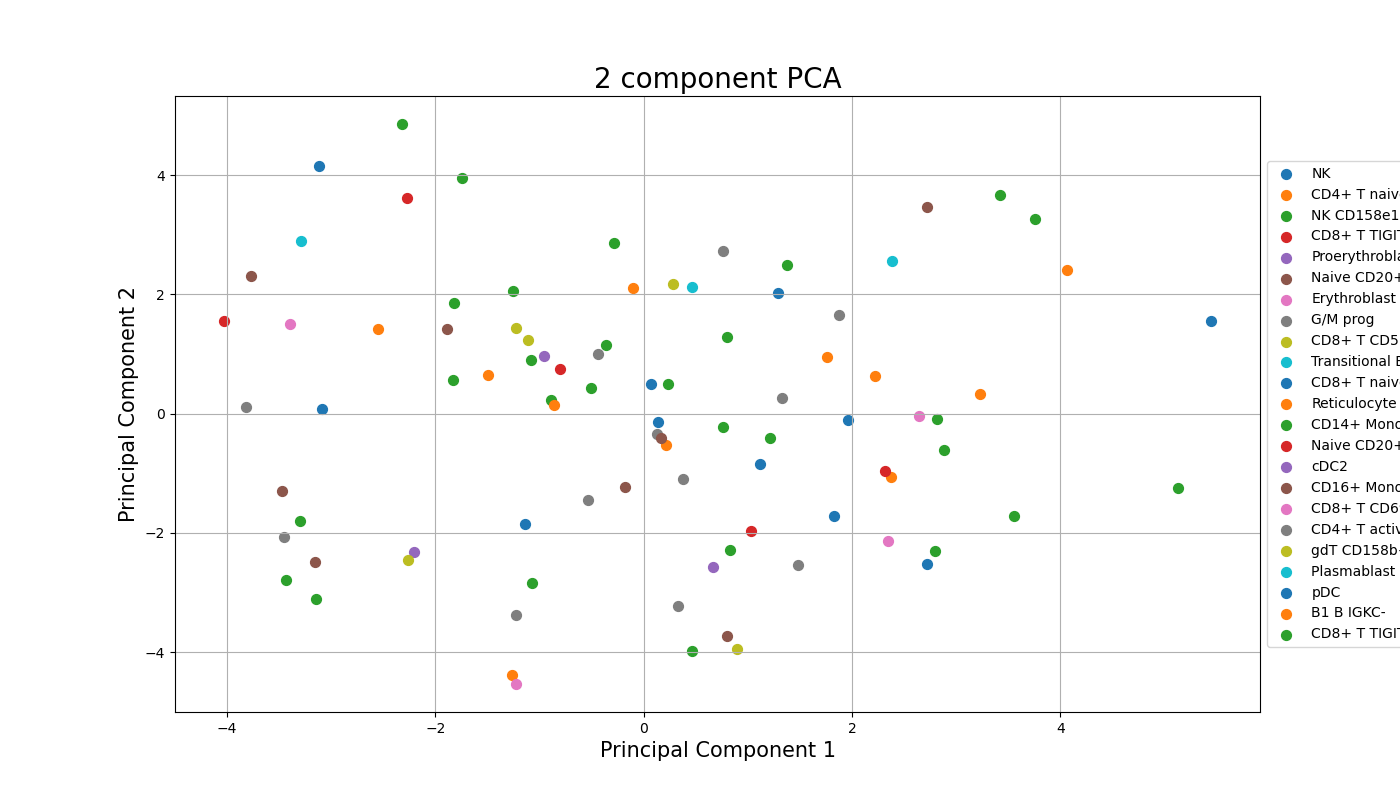

In [40]:
display(Image(filename='plots/PCA_test_zdim150.png', width = 600))

### Custom Decoder

Single-cell RNA-seq data that we recieved looks like it is distributed much more like negativa binomial that gaussian. Therefore my custom decoder is going to use such distrubution to decode.

I would look something like this:

```python
class NetworkCustom(torch.nn.Module):
  def __init__(self, input_dim, h_dim = 200, z_dim=20, o_dim=20):
    super(NetworkCustom, self).__init__()
    self.img2hid = nn.Linear(input_dim, h_dim)
    self.hid2mu_e = nn.Linear(h_dim, z_dim)
    self.hid2sigma_e = nn.Linear(h_dim, z_dim)

    self.z2hid = nn.Linear(z_dim, h_dim)
    self.hid2tot_count = nn.Linear(h_dim, input_dim)
    self.hid2probs = nn.Linear(h_dim, input_dim)

    self.relu = nn.ReLU()

  def encode(self, x):
    h = self.relu(self.img2hid(x))
    mu, sigma = self.hid2mu_e(h), self.hid2sigma_e(h)
    return mu, sigma

  def decode(self, z):
    h = self.relu(self.z2hid(z))
    tc =  torch.exp(self.hid2tot_count(h))
    probs = torch.sigmoid(self.hid2probs(h))
    return tc, probs

class DecoderNegBinomial(torch.nn.Module):
  def __init__(self, network):
    super(DecoderNegBinomial, self).__init__()
    self.network = network
    self.dist = None

  def _sample(self):
    self.dist.sample()

  def log_prob(self,x):
    x = x.to(torch.int)
    return self.dist.log_prob(x).sum()

  def forward(self,x):
    tc, probs = self.network.decode(x)
    self.dist = torch.distributions.NegativeBinomial(tc, probs)
    self.tc = tc
    self.probs = probs
    return tc, probs
```

Losses for Negative Binomial Decoder:


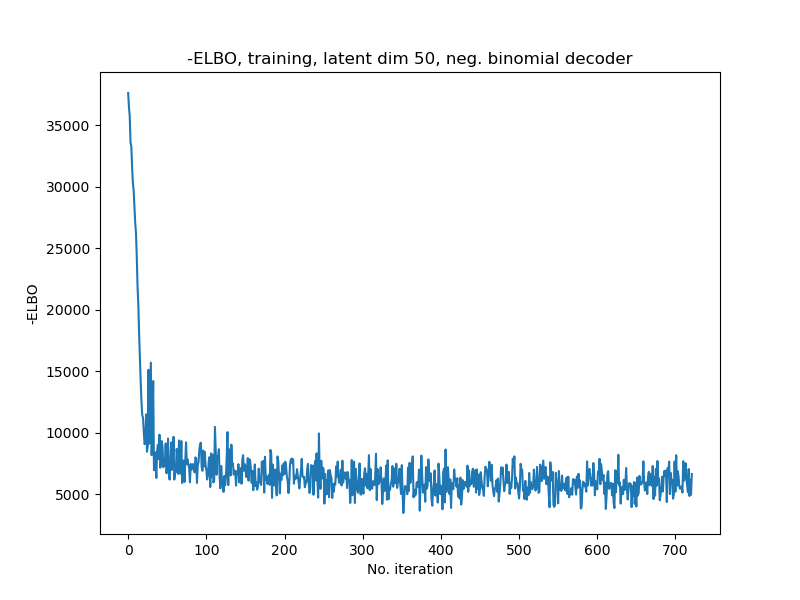

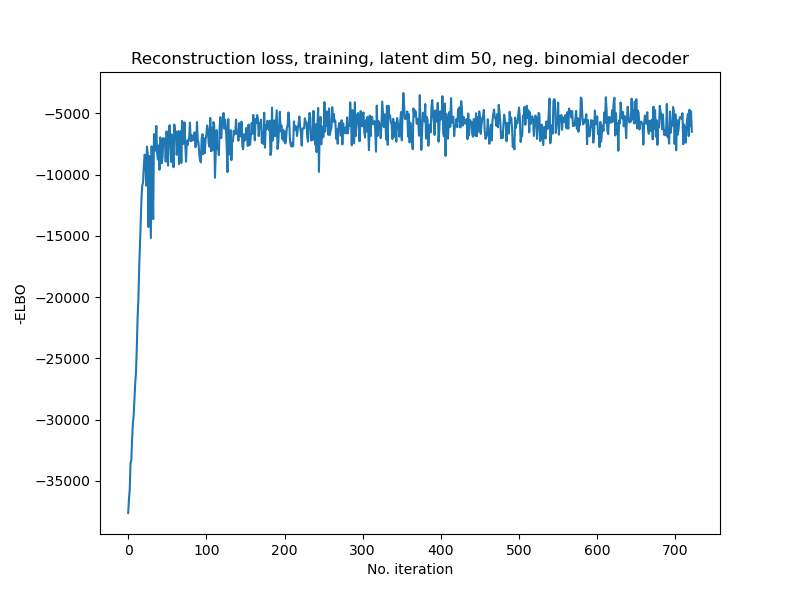

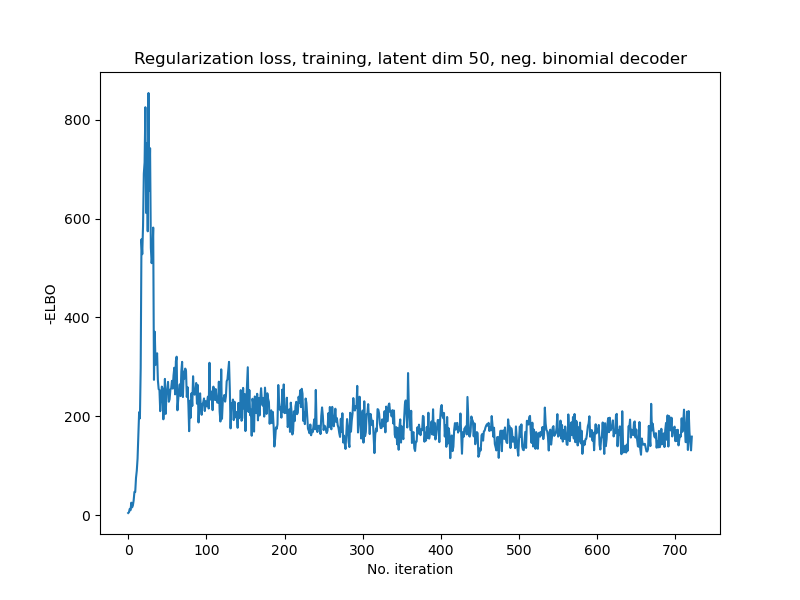

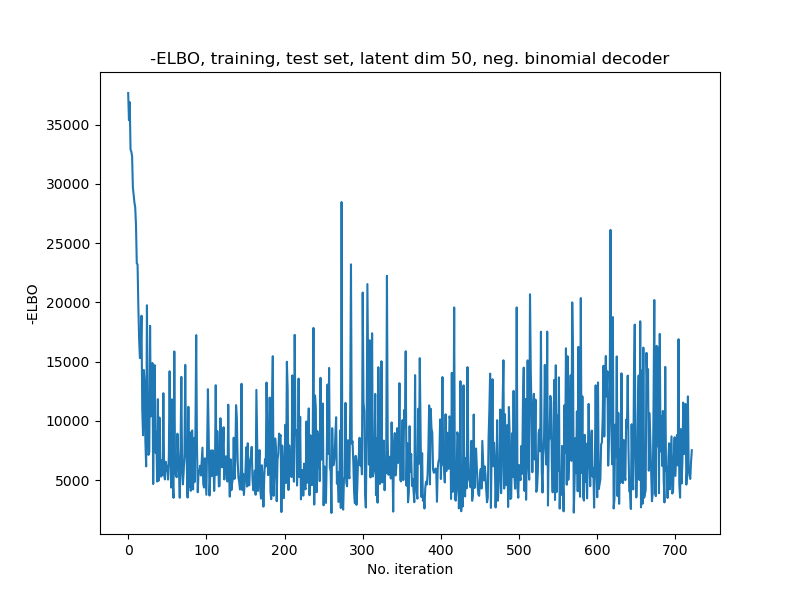

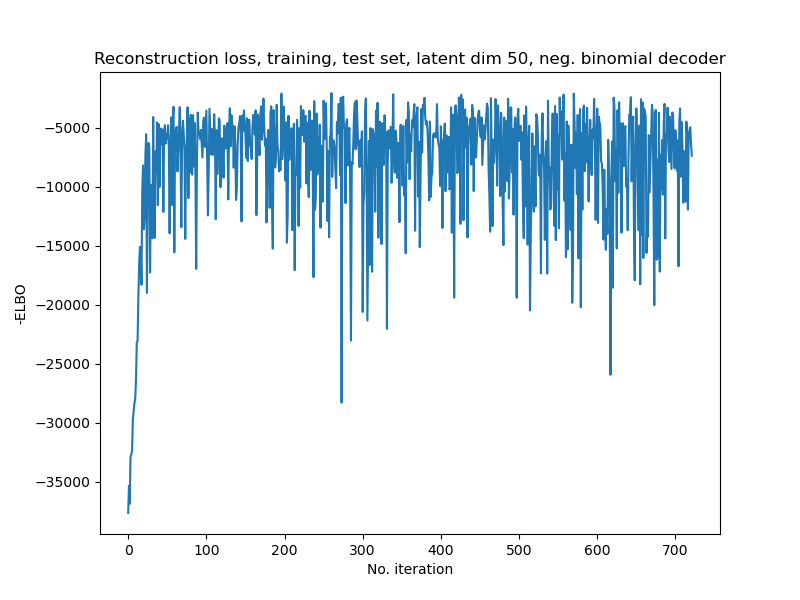

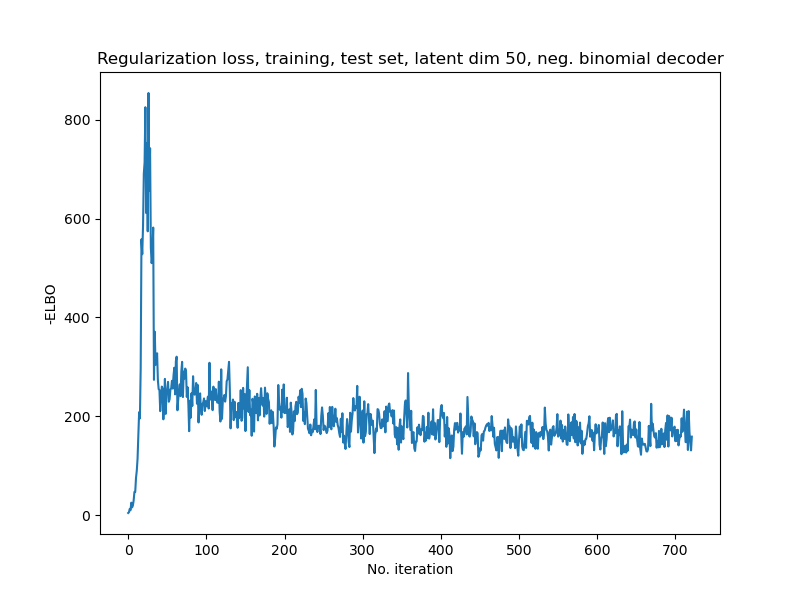

In [41]:
display(Image(filename='plots/TRAIN_ELBO_b1_epochs1_hdim200_zdim50_lr0.0005_batch20_negbin.png', width = 400))
display(Image(filename='plots/TRAIN_REC_LOSS_b1_epochs1_hdim200_zdim50_lr0.0005_batch20_negbin.png', width = 400))
display(Image(filename='plots/TRAIN_REG_LOSS_b1_epochs1_hdim200_zdim50_lr0.0005_batch20_negbin.png', width = 400))
display(Image(filename='plots/TEST_ELBO_b1_epochs1_hdim200_zdim50_lr0.0005_batch20_negbin.png', width = 400))
display(Image(filename='plots/TEST_REC_LOSS_b1_epochs1_hdim200_zdim50_lr0.0005_batch20_negbin.png', width = 400))
display(Image(filename='plots/TEST_REG_LOSS_b1_epochs1_hdim200_zdim50_lr0.0005_batch20_negbin.png', width = 400))

Training process was faster for Negative Binomial Decoder therefore a could test it on larger piece of data (10%). There is not enough data for me to compare both decoders.

Plots for whole dataset (added after deadline):


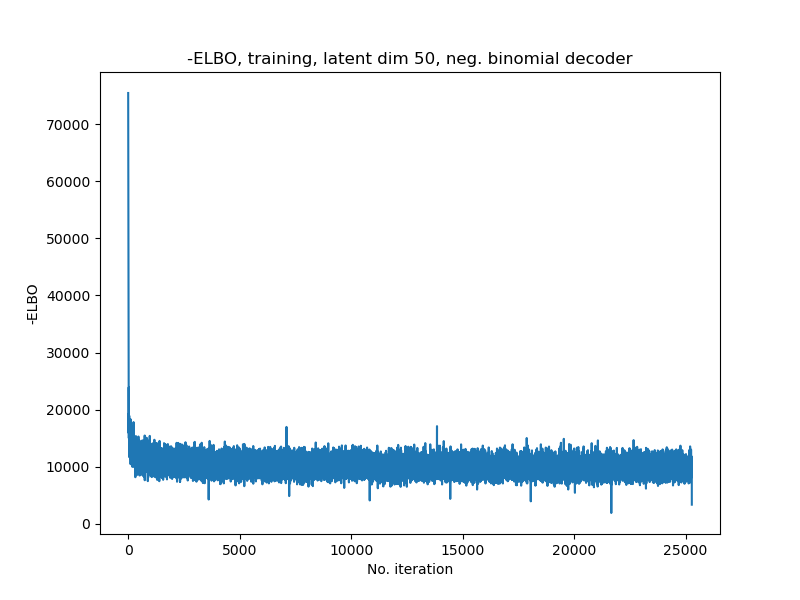

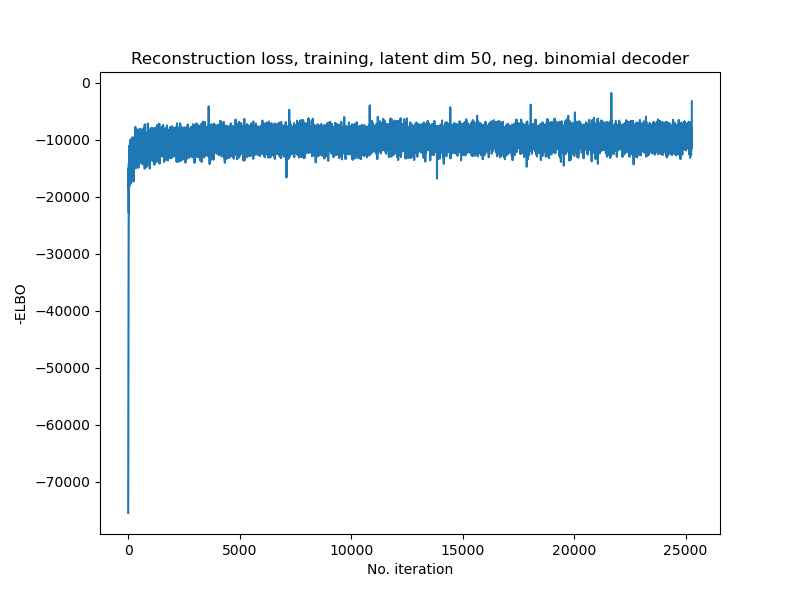

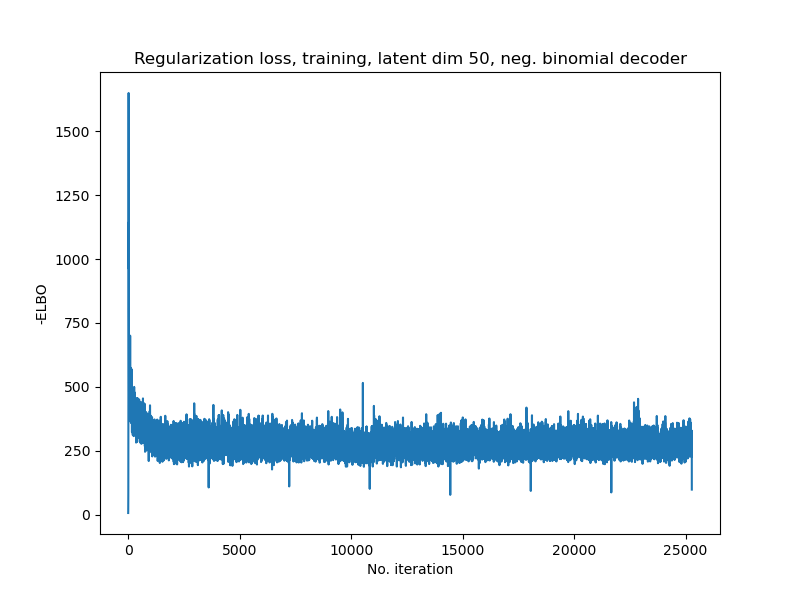

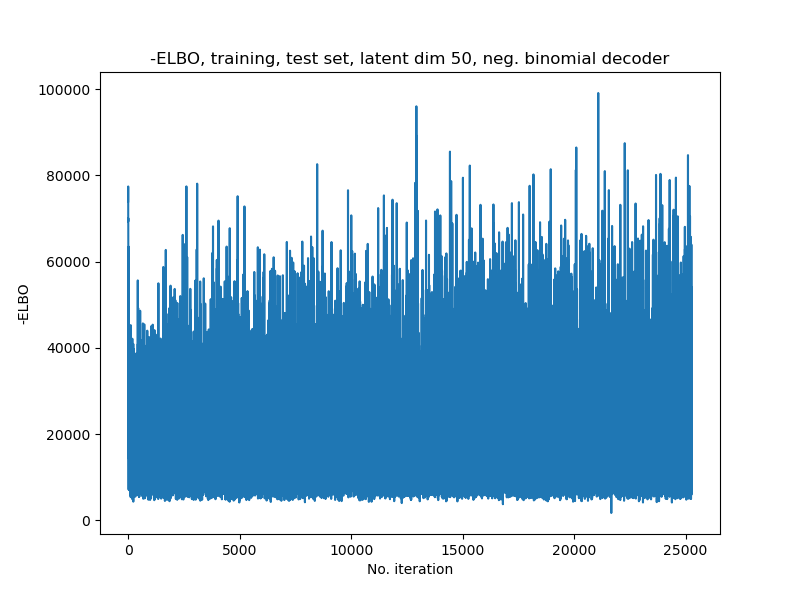

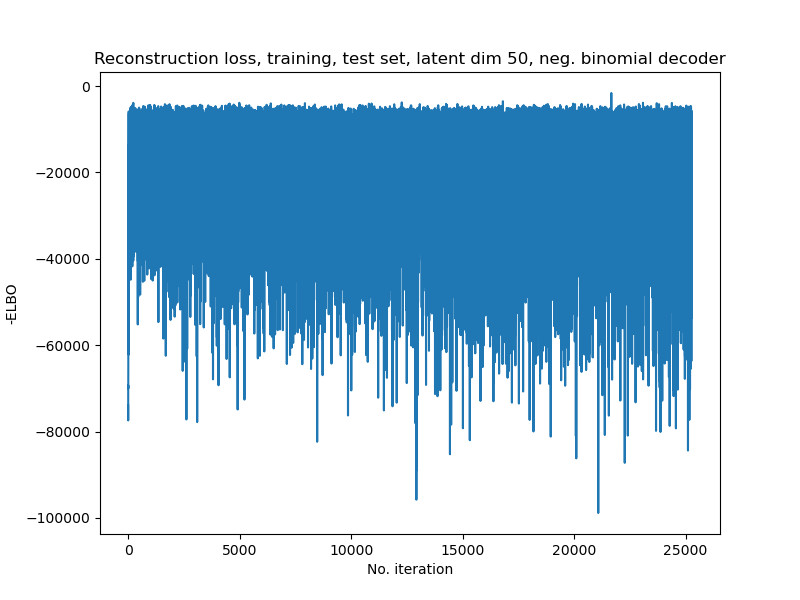

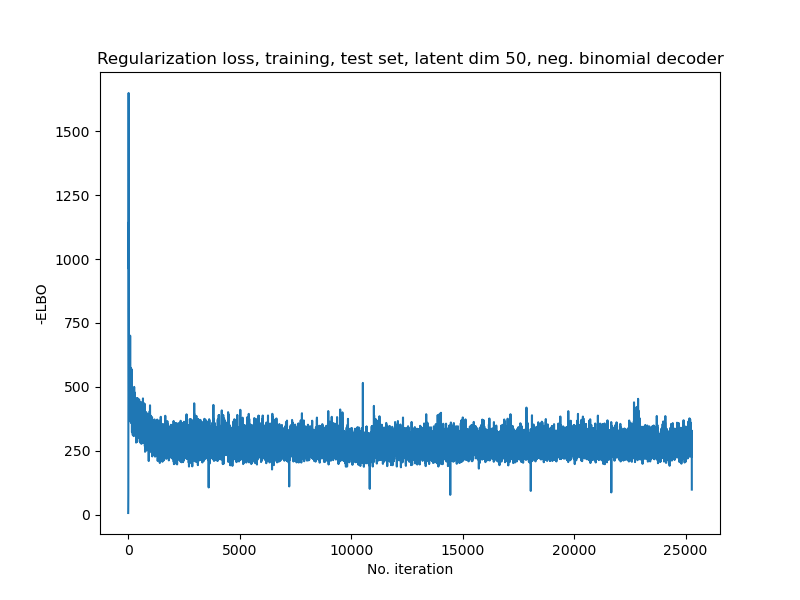

In [43]:
display(Image(filename='plots/TRAIN_ELBO_b1_epochs7_hdim200_zdim50_lr0.005_batch20_negbin.png', width = 400))
display(Image(filename='plots/TRAIN_REC_LOSS_b1_epochs7_hdim200_zdim50_lr0.005_batch20_negbin.png', width = 400))
display(Image(filename='plots/TRAIN_REG_LOSS_b1_epochs7_hdim200_zdim50_lr0.005_batch20_negbin.png', width = 400))
display(Image(filename='plots/TEST_ELBO_b1_epochs7_hdim200_zdim50_lr0.005_batch20_negbin.png', width = 400))
display(Image(filename='plots/TEST_REC_LOSS_b1_epochs7_hdim200_zdim50_lr0.005_batch20_negbin.png', width = 400))
display(Image(filename='plots/TEST_REG_LOSS_b1_epochs7_hdim200_zdim50_lr0.005_batch20_negbin.png', width = 400))